In [1]:
import autograd.numpy as np
from autograd import grad, jacobian
from scipy.optimize import minimize
import copy
from model import create_ploy_basis_file, find_cq
import matplotlib.pyplot as plt

plt.rcParams["font.family"] = "Times New Roman"

np.random.seed(0)

# specify f
dimension = 11
C_mean = np.array([0.055321343058332716, 0.002684394475653686, 0.0053812881489740455, 0.004775631881797791, 7.445040626409247e-5, 0.004887427681876724, 2.557065105708802e-6, 6.345562720622994e-10, 0.001971709115538841, 0.005105230370664385, 0.0024610577799671312])
C_std = np.array([0.02816310486806349, 0.002090151158878614, 0.0028420293628321357, 0.0035037348387876753, 0.0003153445895529354, 0.0026419548541995806, 6.234305324569198e-6, 3.3262218978881104e-10, 0.001331829143046077, 0.00420027298440212, 0.0009780735821362766])
k_mean = np.array([0.5, 20.284927666411168, 21.39940769774151, 0.015000000000000036, 0.021999999999999992, 12750.917857751701, 11982.577983735397, 14334.807349326506, 0.0003000000000000002, 2247.469944787967])
def f(x):
    
    xdot = np.zeros((dimension, x.shape[1]))
    '''k1 = 1;
    k2 = 1;
    k3 = 1;
    k4 = 1;
    k5 = 1;
    k6 = 1;
    k7 = 1;
    k8 = 1;
    k9 = 1;
    k10 = 1;'''
    
    k1 = k_mean[0]
    k2 = k_mean[1]
    k3 = k_mean[2]
    k4 = k_mean[3]
    k5 = k_mean[4]
    k6 = k_mean[5]
    k7 = k_mean[6]
    k8 = k_mean[7]
    k9 = k_mean[8]
    k10 = k_mean[9]
    
    xdot[0] = k2*x[7] - k3*x[0]*x[1]
    xdot[1] = k1*x[2] - k3*x[0]*x[1] - k7*x[1]*x[4]
    xdot[2] = -k1*x[2] + k3*x[0]*x[1] + k7*x[1]*x[4] - k8*x[2]*x[6]
    xdot[3] = -k4*x[3] - k5*x[3] - k6*x[3]*x[6]
    xdot[4] = 2*k4*x[3] + k6*x[3]*x[6] - k7*x[1]*x[4] + k10*x[5]*x[6]
    xdot[5] = -k9*x[5] - k10*x[5]*x[6]
    xdot[6] = -k6*x[3]*x[6] + k7*x[1]*x[4] - k8*x[2]*x[6] + 2*k9*x[5] - k10*x[5]*x[6]
    xdot[7] = k1*x[2] - k2*x[7]
    xdot[8] = k8*x[2]*x[6]
    xdot[9] = k4*x[3] + k5*x[3] + k6*x[3]*x[6]
    xdot[10] = k5*x[3]

    #xdot = xdot/np.linalg.norm(xdot, axis=0)[np.newaxis, :]
    
    #print(xdot.shape)
    # return xdot
    return xdot


# load basis file
create_ploy_basis_file(orders=[1], num_variable=dimension, path="./basis.txt")
bases = np.loadtxt('./basis.txt', dtype='str')


In [2]:
# create x by loading in data or creating with mean + std

# loading in data
x = np.loadtxt('./data.txt', delimiter=",")

# creating with mean + std (assuming Gaussian)
# num_points = 100
# x = np.random.normal(0,1,(dimension,num_points))
# x = 3 * x * C_std[:,np.newaxis] + C_mean[:,np.newaxis]

In [3]:
num_points = 10000
x = x[np.random.choice(x.shape[0], num_points, replace=False)]
x = np.transpose(x[:,4:])

In [7]:
tol_cq = 1e-8
tol_dep = 1e-8
results = find_cq(f, x, bases, tol_cq=tol_cq, tol_dep=tol_dep, sparse_run=10, sparse_tol=1e-32)

#### Computing bases and gradients #####
#### Solving thetas ####
#### Sparsifying thetas ####
0/10
1/10
2/10
3/10
4/10
5/10
6/10
7/10
8/10
9/10
#### Selecting independent CQs ####
CQ number=3 , confidence=1.0


Text(0, 0.5, 'singulvar value $\\sigma_i$')

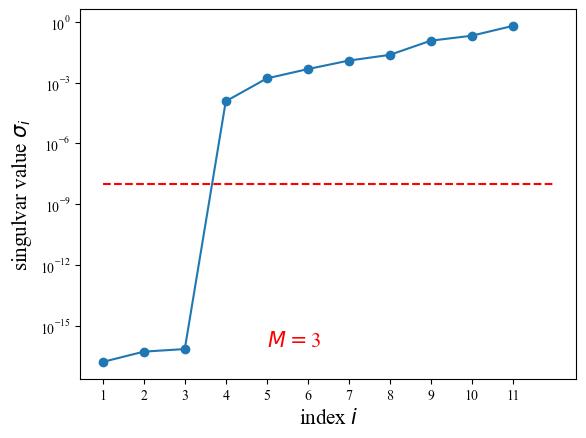

In [8]:
s_cq = results['s_cq'][::-1]
n_cq_dep = np.sum(s_cq<tol_cq)
plt.plot(np.arange(s_cq.shape[0])+1,s_cq,marker="o")
plt.plot([1, s_cq.shape[0]+1],[tol_cq, tol_cq], ls="--",color="red")
#plt.plot([1, s_cq.shape[0]+1],[tol_cq*0.1, tol_cq*0.1], ls="--",color="green")
plt.text(5,1e-16,r"$M=$"+"{}".format(n_cq_dep),fontsize=15,color="red")
plt.yscale('log')
plt.xticks(np.arange(s_cq.shape[0])+1);
plt.xlabel('index '+r"$i$", fontsize=15)
plt.ylabel('singulvar value '+r"$\sigma_i$", fontsize=15)

Text(0, 0.5, 'singulvar value $s_i$')

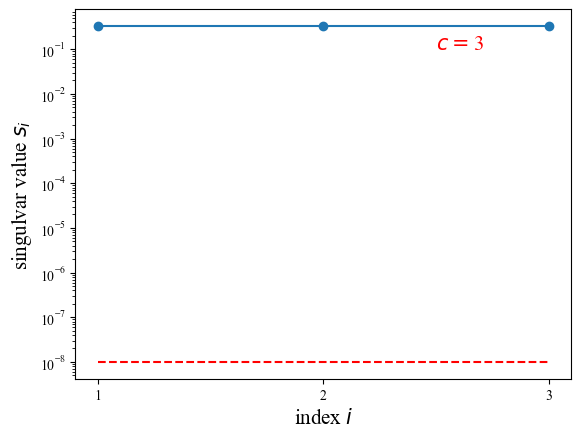

In [9]:
S = results['s_cq_independent']
n_cq_indep = np.sum(np.mean(S, axis=0)>tol_dep)
plt.plot(np.arange(S.shape[1])+1,np.mean(S, axis=0),marker="o")
plt.plot([1, S.shape[1]],[tol_dep, tol_dep], ls="--",color="red")
plt.text(2.5,1e-1,r"$c=$"+"{}".format(n_cq_indep),fontsize=15,color="red")
plt.yscale('log')
plt.xticks(np.arange(S.shape[1])+1);
plt.xlabel('index '+r"$i$", fontsize=15)
plt.ylabel('singulvar value '+r"$s_i$", fontsize=15)

Text(0, 0.5, 'singulvar value $s_i$')

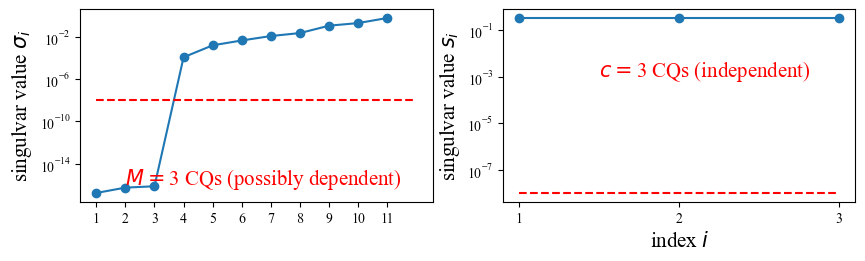

In [10]:
plt.figure(figsize=(10,2.5))

plt.subplot(1,2,1)

s_cq = results['s_cq'][::-1]
plt.plot(np.arange(s_cq.shape[0])+1,s_cq,marker="o")
plt.plot([1, s_cq.shape[0]+1],[tol_cq, tol_cq], ls="--",color="red")
plt.text(2,1e-16,r"$M=$"+"{}".format(n_cq_dep)+" CQs (possibly dependent)",fontsize=15,color="red")
plt.yscale('log')
plt.xticks(np.arange(s_cq.shape[0])+1);
#plt.xlabel('index '+r"$i$", fontsize=15)
plt.ylabel('singulvar value '+r"$\sigma_i$", fontsize=15)

plt.subplot(1,2,2)
S = results['s_cq_independent']
plt.plot(np.arange(S.shape[1])+1,np.mean(S, axis=0),marker="o")
plt.plot([1, S.shape[1]],[tol_dep, tol_dep], ls="--",color="red")
plt.text(1.5,1e-3,r"$c=$"+"{}".format(n_cq_indep)+" CQs (independent)",fontsize=15,color="red")
plt.yscale('log')
plt.xticks(np.arange(S.shape[1])+1);
plt.xlabel('index '+r"$i$", fontsize=15)
plt.ylabel('singulvar value '+r"$s_i$", fontsize=15)
#plt.savefig('./fig/chem_sv.pdf', bbox_inches="tight")

Text(0.5, 1.0, 'Regular')

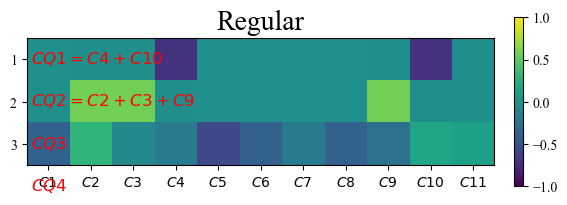

In [11]:
sols = results['sol_cq_independent']
plt.yticks([0,1,2,3,4],[1,2,3,4,5])

#plt.set_title(r'$\Theta^{(3)}$',fontsize=15)
ticks = [r'$C1$',r'$C2$',r'$C3$',r'$C4$',r'$C5$',r'$C6$',r'$C7$',r'$C8$',r'$C9$',r'$C10$',r'$C11$']
plt.xticks(np.arange(11), ticks)
im = plt.imshow(sols, vmin=-1, vmax=1)

plt.text(-0.4,0.1,r"$CQ1=C4+C10$", fontsize=12,color="red")
plt.text(-0.4,1.1,r"$CQ2=C2+C3+C9$", fontsize=12,color="red")
plt.text(-0.4,2.1,r"$CQ3$", fontsize=12,color="red")
plt.text(-0.4,3.1,r"$CQ4$", fontsize=12,color="red")

plt.colorbar(fraction=0.017, pad=0.04)
plt.title("Regular",fontsize=20)

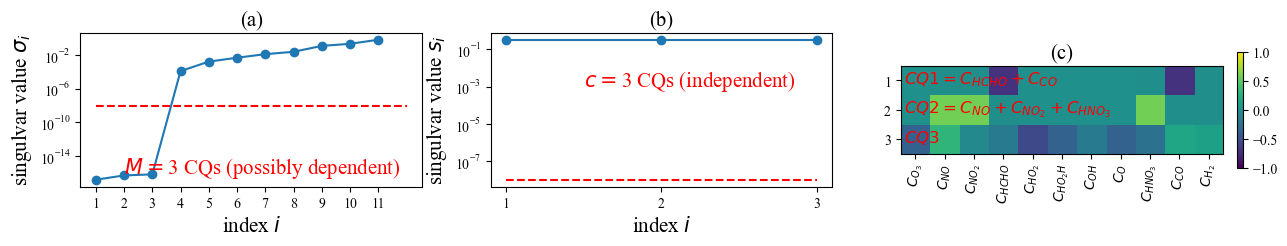

In [16]:
plt.figure(figsize=(15,2))

plt.subplot(1,3,1)

s_cq = results['s_cq'][::-1]
plt.plot(np.arange(s_cq.shape[0])+1,s_cq,marker="o")
plt.plot([1, s_cq.shape[0]+1],[tol_cq, tol_cq], ls="--",color="red")
plt.text(2,1e-16,r"$M=$"+"{}".format(n_cq_dep)+" CQs (possibly dependent)",fontsize=15,color="red")
plt.yscale('log')
plt.xticks(np.arange(s_cq.shape[0])+1);
#plt.xlabel('index '+r"$i$", fontsize=15)
plt.xlabel('index '+r"$i$", fontsize=15)
plt.ylabel('singulvar value '+r"$\sigma_i$", fontsize=15)
plt.title('(a)', fontsize=15)

plt.subplot(1,3,2)
S = results['s_cq_independent']
plt.plot(np.arange(S.shape[1])+1,np.mean(S, axis=0),marker="o")
plt.plot([1, S.shape[1]],[tol_dep, tol_dep], ls="--",color="red")
plt.text(1.5,1e-3,r"$c=$"+"{}".format(n_cq_indep)+" CQs (independent)",fontsize=15,color="red")
plt.yscale('log')
plt.xticks(np.arange(S.shape[1])+1);
plt.xlabel('index '+r"$i$", fontsize=15)
plt.ylabel('singulvar value '+r"$s_i$", fontsize=15)
plt.title('(b)', fontsize=15)

plt.subplot(1,3,3)
sols = results['sol_cq_independent']
plt.yticks([0,1,2,3,4],[1,2,3,4,5])

#plt.set_title(r'$\Theta^{(3)}$',fontsize=15)
ticks = [r'$C_{O_3}$',r'$C_{NO}$',r'$C_{NO_2}$',r'$C_{HCHO}$',r'$C_{HO_2}$',r'$C_{HO_2H}$',r'$C_{OH}$',r'$C_O$',r'$C_{HNO_3}$',r'$C_{CO}$',r'$C_{H_2}$']
plt.xticks(np.arange(11), ticks, rotation=90)
im = plt.imshow(sols, vmin=-1, vmax=1)

plt.text(-0.4,0.1,r"$CQ1=C_{HCHO}+C_{CO}$", fontsize=12,color="red")
plt.text(-0.4,1.1,r"$CQ2=C_{NO}+C_{NO_2}+C_{HNO_3}$", fontsize=12,color="red")
plt.text(-0.4,2.1,r"$CQ3$", fontsize=12,color="red")
#plt.text(-0.4,3.1,r"$CQ4$", fontsize=12,color="red")
plt.title('(c)', fontsize=15)

'''plt.text(-0.4,0.1,r"$C11$", fontsize=12,color="red")
plt.text(-0.4,1.1,r"$C4+C10$", fontsize=12,color="red")
plt.text(-0.4,2.1,r"$C2+C3+C9$", fontsize=12,color="red")
plt.text(-0.4,3.1,r"$C2+C3-3C5-3C7+2C9$", fontsize=12,color="red")
plt.text(-0.4,4.1,r"$-2C1+C2-C3-C4-C5-2C6+C7-2C8+C10$", fontsize=12,color="red")'''

plt.colorbar(fraction=0.017, pad=0.04)
#plt.title("Regular",fontsize=20)

plt.savefig('./fig/chem.pdf', bbox_inches="tight")

In [ ]:
sols